# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd
import numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [2]:
#On importe les données dans un dataframe
df_historique = pd.read_excel('historique_immobilier_paris_2017_2021.xlsx')

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
df_historique.dtypes

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [4]:
print('La liste des différents types de biens immobiliers que nous avons dans les données est :')
print(df_historique['type_local'].unique())

La liste des différents types de biens immobiliers que nous avons dans les données est :
['Appartement' 'Local industriel. commercial ou assimilé']


On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 ou 4.

In [5]:
df_historique[['code_type_local', 'type_local']].groupby('code_type_local').first()

,type_local
code_type_local,
2,Appartement
4,Local industriel. commercial ou assimilé


### 3. Nombre de transactions

In [6]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('Le nombre de transactions dans les données est {}.'.format(df_historique.shape[0]))
print('Le nombre de transactions pour les appartements dans les données est {}.'.format(df_historique.loc[df_historique['code_type_local'] == 2].shape[0]))
print('Le nombre de transactions pour les locaux commerciaux dans les données est {}.'.format(df_historique.loc[df_historique['code_type_local'] == 4].shape[0]))

Le nombre de transactions dans les données est 26196.
Le nombre de transactions pour les appartements dans les données est 24353.
Le nombre de transactions pour les locaux commerciaux dans les données est 1843.


### 4. Interval de l'historique des données

In [7]:
#On vérifie également la plage de l'historique disponible
print('La première date de transaction dans les données est le {}.'.format(df_historique['date_mutation'].min()))
print('La dernière date de transaction dans les données est le {}.'.format(df_historique['date_mutation'].max()))

La première date de transaction dans les données est le 2017-01-02 00:00:00.
La dernière date de transaction dans les données est le 2021-12-31 00:00:00.


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [8]:
# Calcul de la colonne 'prix_m2'
df_historique['prix_m2'] = (df_historique['valeur_fonciere'] / df_historique['surface_reelle']).round(2)

display(df_historique)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11
...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,Appartement,37,12735.78
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,150,13215.54
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,Appartement,26,12016.77
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,Appartement,13,12017.18


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [9]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
del df_historique['adresse_numero']
del df_historique['adresse_nom_voie']
del df_historique['nom_commune']

In [10]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df_appart = df_historique.loc[df_historique['code_type_local'] == 2]

df_appart['prix_m2'] = df_appart['valeur_fonciere'] / df_appart['surface_reelle']

df_appart = df_appart.groupby(df_historique['date_mutation'].dt.year).agg(
                prix_m2_moyen =('prix_m2', 'mean'),
                surface_moyenne =('surface_reelle', 'mean')).reset_index()

display(df_appart)

C:\Users\mdarg\AppData\Local\Temp\ipykernel_18808\3879500196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_appart['prix_m2'] = df_appart['valeur_fonciere'] / df_appart['surface_reelle']


,date_mutation,prix_m2_moyen,surface_moyenne
0,2017,9492.859195,44.627737
1,2018,10031.403432,44.271671
2,2019,10562.712581,43.361645
3,2020,10674.872650,42.900654
4,2021,10455.600126,43.479864


On constate sur la moyenne des prix de vente des appartements à Paris que les prix ont globalement augmenté de 2017 à 2020, avec une légère baisse en 2021.<br>
Nous allons créer un graphique pour mieux le visualiser.

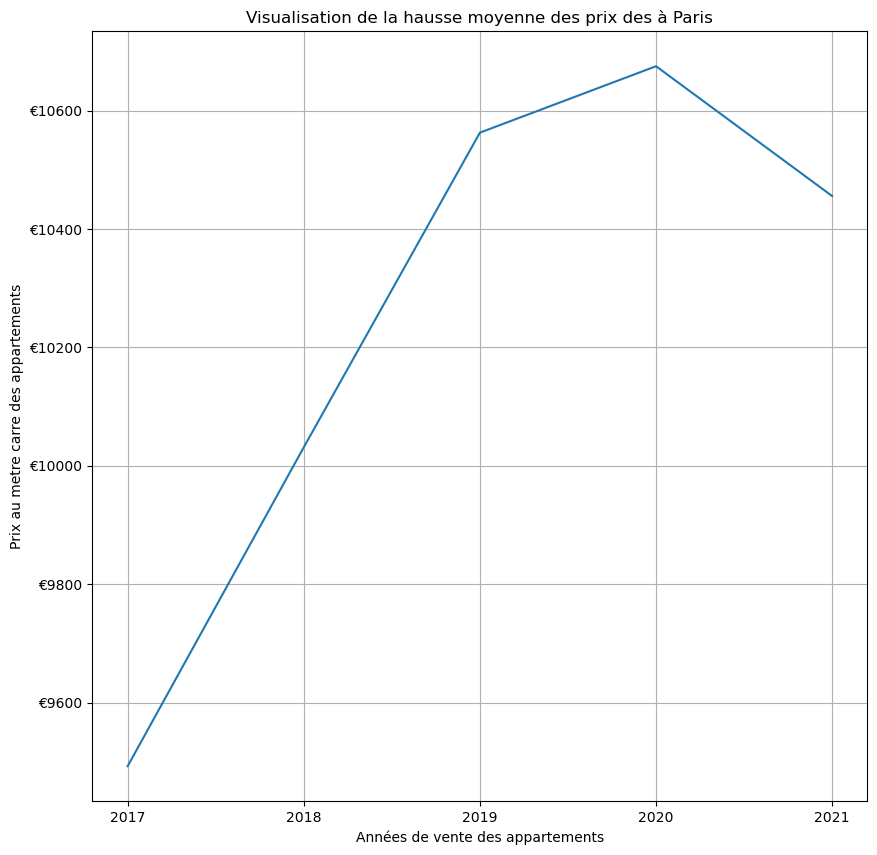

In [11]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'], df_appart['prix_m2_moyen'])
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [12]:
#Liste des codes postaux dans nos données.
sorted(df_historique['code_postal'].unique())

[75001,
 75002,
 75003,
 75004,
 75005,
 75006,
 75007,
 75008,
 75009,
 75010,
 75011,
 75012,
 75013,
 75014,
 75015,
 75016,
 75017,
 75018,
 75019,
 75020]

In [13]:
#Créeons un dataframe pour une deuxième visualisation avec l'évolution des prix par arrondissement
df_arrondissement = df_historique.loc[df_historique['code_type_local'] == 2]

df_arrondissement['annee'] = df_arrondissement['date_mutation'].dt.year
df_arrondissement['prix_m2'] = df_arrondissement['valeur_fonciere'] / df_arrondissement['surface_reelle']

df_arrondissement = df_arrondissement.groupby(['annee', 'code_postal']).agg(
                        prix_m2_moyen = ('prix_m2', 'mean')).reset_index()

display(df_arrondissement)

C:\Users\mdarg\AppData\Local\Temp\ipykernel_18808\2676292559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arrondissement['annee'] = df_arrondissement['date_mutation'].dt.year
C:\Users\mdarg\AppData\Local\Temp\ipykernel_18808\2676292559.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arrondissement['prix_m2'] = df_arrondissement['valeur_fonciere'] / df_arrondissement['surface_reelle']


,annee,code_postal,prix_m2_moyen
0,2017,75001,11762.706289
1,2017,75002,10920.126562
2,2017,75003,11679.818729
3,2017,75004,12407.227522
4,2017,75005,11306.752404
...,...,...,...
95,2021,75016,10790.307817
96,2021,75017,10372.368746
97,2021,75018,9665.640629
98,2021,75019,8828.586057


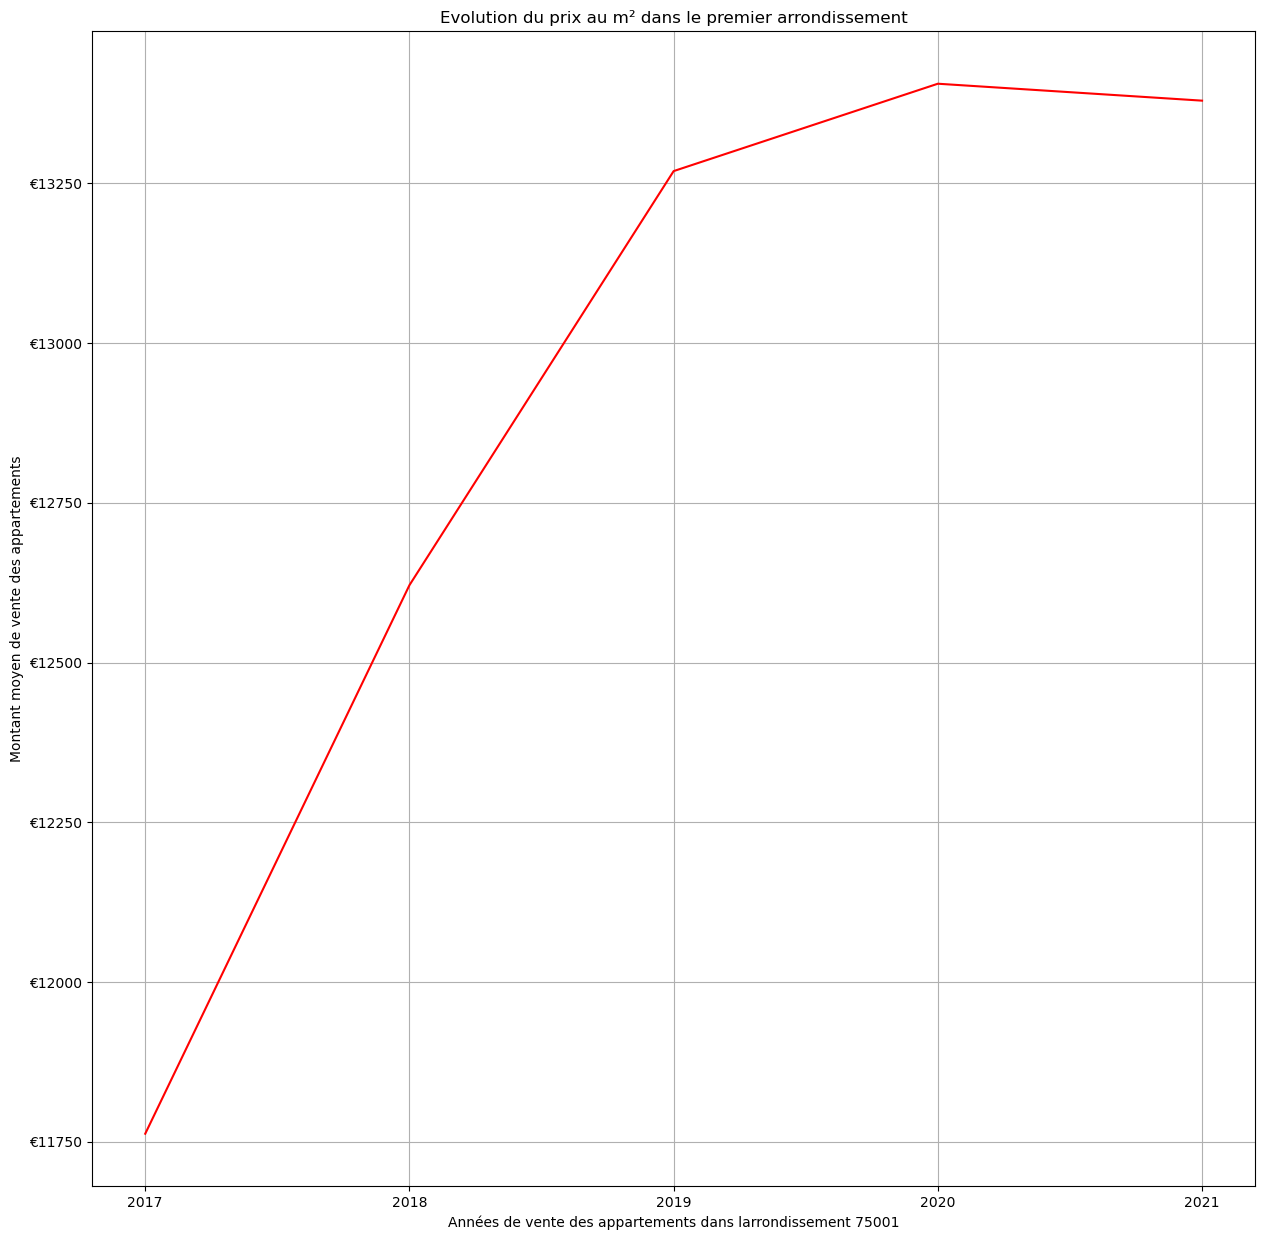

In [14]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
df_75001 = df_arrondissement.loc[df_arrondissement['code_postal'] == 75001]

plt.figure(figsize=(15,15))
plt.plot(['2017','2018','2019','2020','2021'], df_75001['prix_m2_moyen'], color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

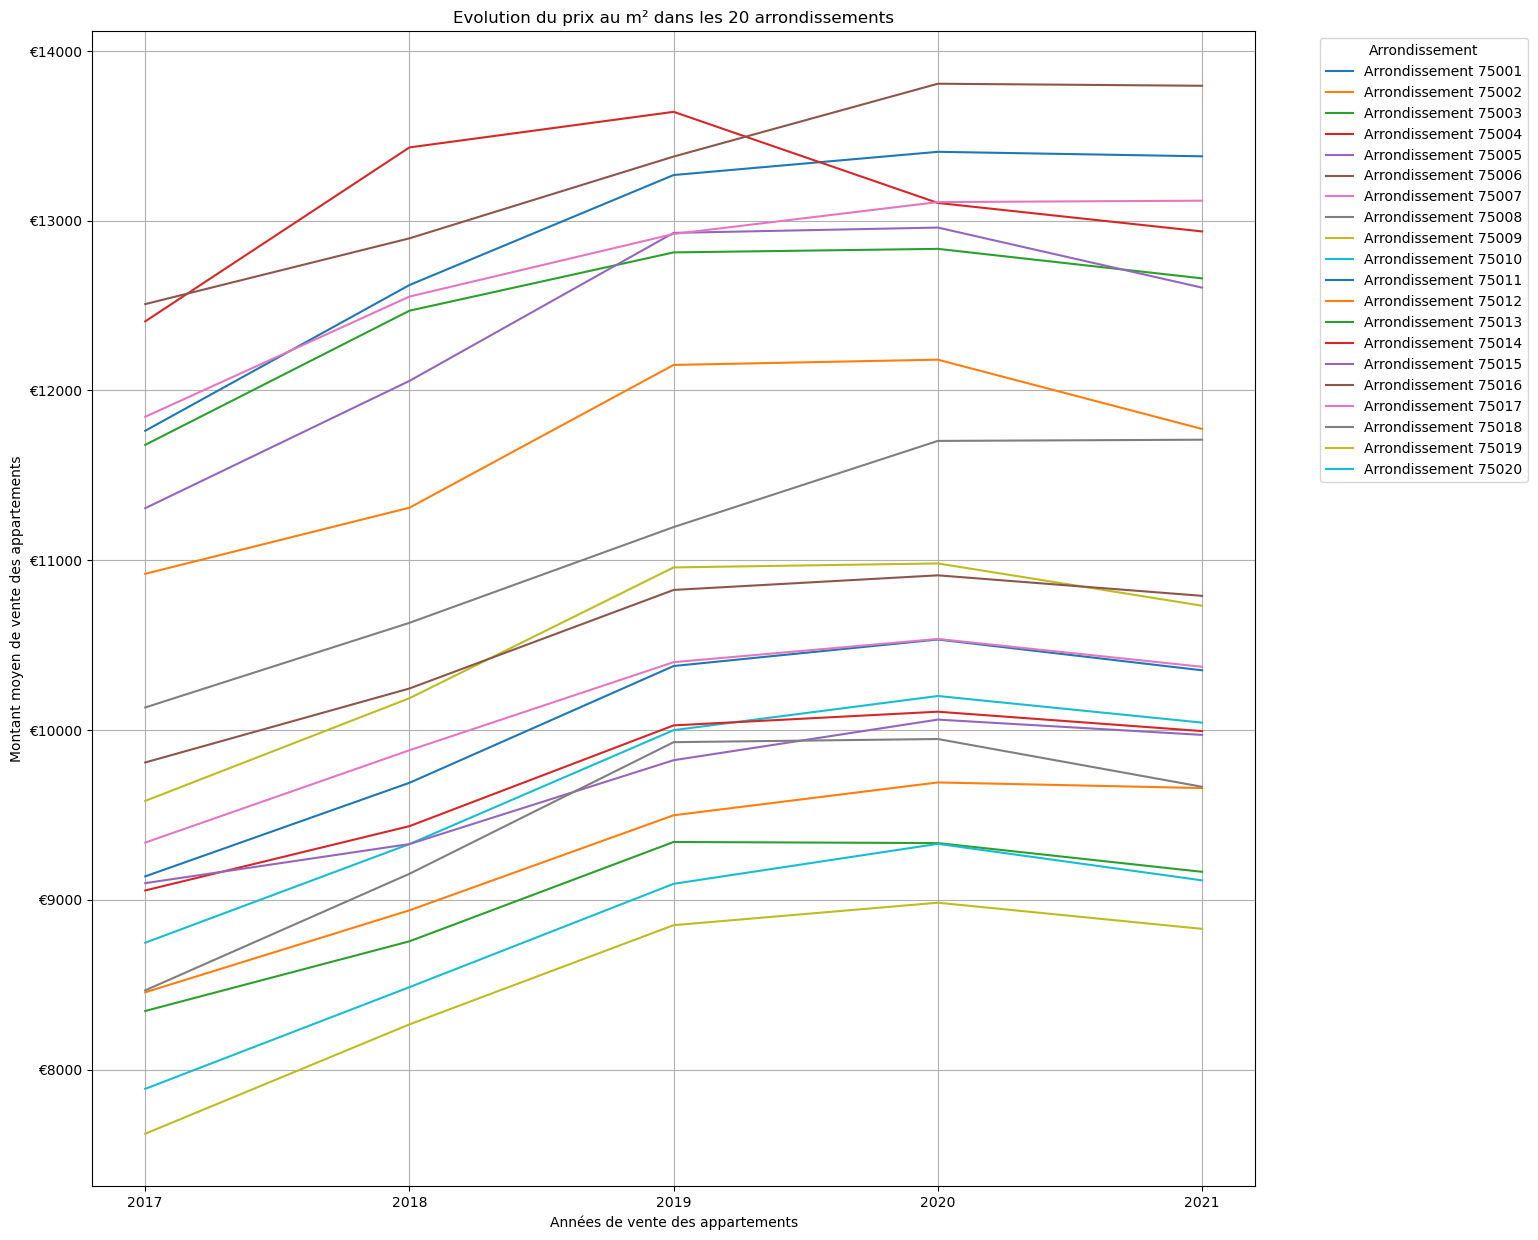

In [15]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
interval_historique=['2017','2018','2019','2020','2021']
#Insérer les lignes à tracer ci-dessous

for arrondissement in df_arrondissement['code_postal'].unique() :
    plt.plot(interval_historique,
        df_arrondissement[df_arrondissement['code_postal'] == arrondissement]['prix_m2_moyen'],
        label=f'Arrondissement {arrondissement}')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.legend(title='Arrondissement', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

On observe que globalement qu'il y a une forte augmentation jusqu'en 2019 qui se stabilise sur les années suivantes voir décroît.

### 7. Prix au metre carré par transaction dans un arrondissement

In [16]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
print('Le nombre de transaction dans le 6ème arrondissement est de :', df_historique.loc[df_historique['code_postal'] == 75006].shape[0])

#Nombre de transactions par arrondissements
df_historique.groupby('code_postal').agg(nb_transaction = ('code_postal', 'count'))

Le nombre de transaction dans le 6ème arrondissement est de : 782


,nb_transaction
code_postal,
75001,468
75002,733
75003,877
75004,590
75005,910
75006,782
75007,667
75008,768
75009,1088


On constate que le nombre de transactions dans le sixième arrondissement est dans la fourchette basse, la moyenne étant de 1290 transactions par arrondissment. Il y a donc une forte dispersion des prix.

Affichons l'historique des transactions pour visualiser la dispersion des données :

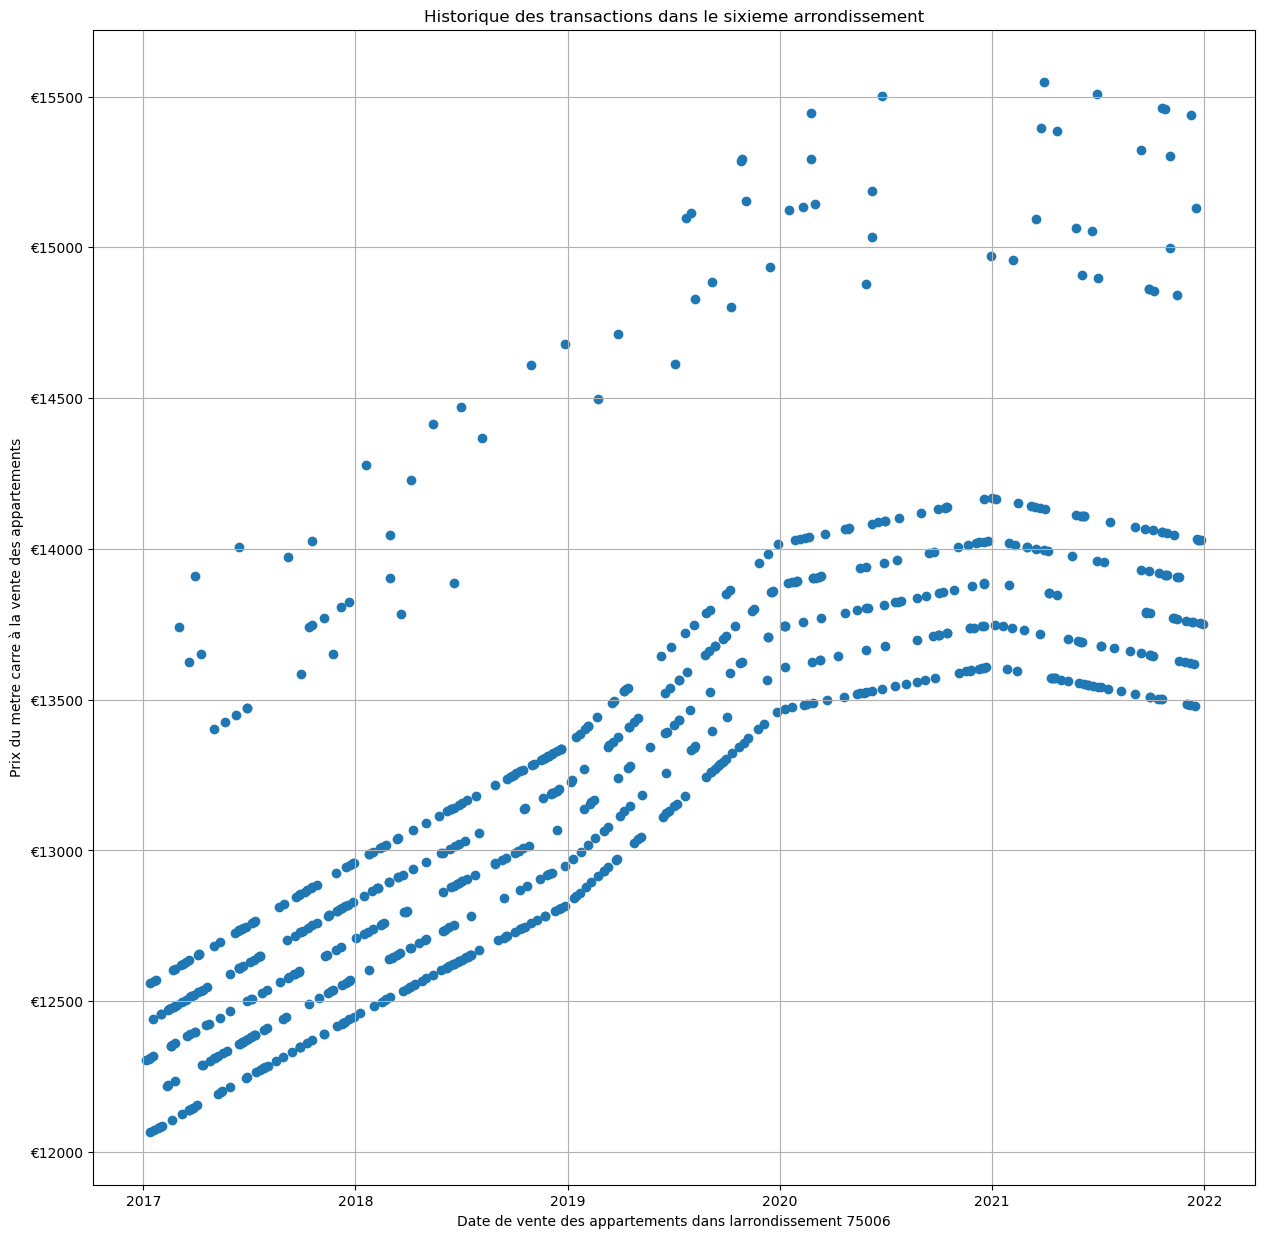

In [17]:
cp = 75006
plt.figure(figsize=(15,15))
df_75006 = df_historique[df_historique['code_postal'] == cp]

#Insérer ci-dessous le scatter plot
plt.scatter(df_75006['date_mutation'], df_75006['prix_m2'])

plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe que plusieurs ventes sont dans une gamme de prix bien superieure aux autres biens du marché sur cet arrondissement.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [18]:
#On calcule la corrélation de Spearman
from scipy import stats as st

correlation, p_value = st.spearmanr(df_75006['prix_m2'], df_75006['date_mutation'].astype(str))

print('Corrélation de Spearman est {} avec une pvalue de {}'.format(correlation, p_value))

Corrélation de Spearman est 0.8314765754643854 avec une pvalue de 2.6649998844846107e-201


### 9. Vérification de la relation entre la valeur fonciere et la surface

In [19]:
print(st.pearsonr(df_75006['valeur_fonciere'], df_75006['surface_reelle']))

PearsonRResult(statistic=0.9950870171911571, pvalue=0.0)


Le coefficient de corrélation est de 0,99 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés

In [20]:
#On crée un dataset qui ne contient que les locaux commerciaux
local = df_historique.loc[df_historique['code_type_local'] == 4]

In [21]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_local = local.groupby(local['date_mutation'].dt.year).agg(
                prix_m2_moyen =('prix_m2', 'mean'),
                surface_moyenne =('surface_reelle', 'mean')).reset_index()

display(df_local)

,date_mutation,prix_m2_moyen,surface_moyenne
0,2017,10949.909513,89.991404
1,2018,11569.499430,88.096866
2,2019,11960.132199,82.826389
3,2020,11966.470268,85.630952
4,2021,12006.488747,92.832000


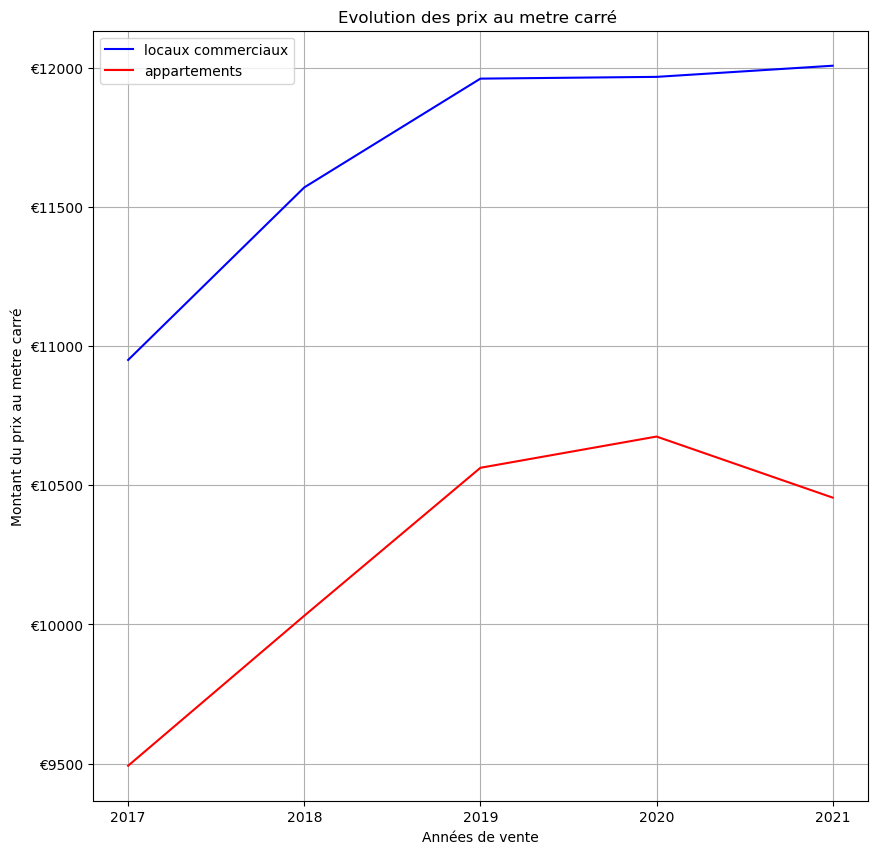

In [22]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],df_local['prix_m2_moyen'], label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],df_appart['prix_m2_moyen'],label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est supérieur au prix des appartements et continue d'augmenter là où il décroit du côté des appartements.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont :
- la surface du bien immobilier,
- la date considérée,
- la localisation (code_postal),
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entraîner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [23]:
df_historique = pd.get_dummies(df_historique, columns= ['code_postal', 'type_local'])

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [24]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
import datetime as dt

df_historique['timestamp'] = (df_historique['date_mutation'] - dt.datetime(1970,1,1)).dt.total_seconds()


X = df_historique.drop(columns=['valeur_fonciere', 'code_type_local', 'date_mutation', 'prix_m2'])
y = df_historique['valeur_fonciere']


# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
display(X)

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp
0,50,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.483402e+09
1,163,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,1.484179e+09
2,66,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,1.484006e+09
3,22,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.484006e+09
4,15,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.484266e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,37,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.614211e+09
26192,150,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1.613520e+09
26193,26,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.615162e+09
26194,13,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.615421e+09


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#On entraîne l'algorithme ci-dessous et on effectue la prédiction
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_test = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
mape = (mae / y_test.mean()) * 100

print("Notre algorithme fait donc {} % d'erreur en moyenne sur la prédiction de la valeur foncière.".format(mape.round(2)))

Notre algorithme fait donc 7.03 % d'erreur en moyenne sur la prédiction de la valeur foncière.


Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Un taux d'erreur de 7,03 % nous montre que notre modèle est capable de donner une prévision relativement précise.
- Pour aller plus loin il peut être intéressant d'utiliser des modèles de prédictions plus complexes qui réduiront le pourcentage d'erreur de prédiction. ou augmenter nombre de donner pour améliorer entrainement

# Milestone 3 - Prédiction définitive pour le client

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez.

In [27]:
#On importe les données dans un dataframe
df_portefeuille = pd.read_excel('portefeuille_actifs.xlsx')
display(df_portefeuille)

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490
...,...,...,...,...,...,...,...,...,...,...,...,...
270,15,AV DE LAUMIERE,75019,75119,Paris 19e Arrondissement,14.12,4,Local industriel. commercial ou assimilé,16,0,2.380450,48.883397
271,3,RUE SAINT-JOSEPH,75002,75102,Paris 2e Arrondissement,14.10,4,Local industriel. commercial ou assimilé,15,0,2.345110,48.868196
272,2,RUE GRETRY,75002,75102,Paris 2e Arrondissement,34.85,4,Local industriel. commercial ou assimilé,35,0,2.337593,48.870514
273,115,RUE D ABOUKIR,75002,75102,Paris 2e Arrondissement,41.61,4,Local industriel. commercial ou assimilé,49,0,2.349804,48.868784


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [28]:
del df_portefeuille['adresse_numero']
del df_portefeuille['adresse_nom_voie']
del df_portefeuille['code_commune']
del df_portefeuille['nom_commune']
del df_portefeuille['surface_carrez']
del df_portefeuille['code_type_local']
del df_portefeuille['nombre_pieces_principales']
del df_portefeuille['longitude']
del df_portefeuille['latitude']

df_portefeuille.rename(columns= {'surface_reelle_bati' : 'surface_reelle'}, inplace=True)

In [29]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
df_portefeuille = pd.get_dummies(df_portefeuille, columns = ['code_postal', 'type_local'])
display(df_portefeuille)

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,25,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,22,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,65,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,22,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
271,15,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
272,35,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
273,49,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [30]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt

df_portefeuille['timestamp'] = (dt.datetime(2022, 12, 31) - dt.datetime(1970,1,1)).total_seconds()

In [31]:
display(df_portefeuille)

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp
0,25,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.672445e+09
1,22,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.672445e+09
2,65,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.672445e+09
3,74,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,1.672445e+09
4,22,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,1.672445e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,1.672445e+09
271,15,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1.672445e+09
272,35,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1.672445e+09
273,49,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1.672445e+09


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [32]:
#On effectue la prédiction
y_pred_portefeuille = reg.predict(df_portefeuille)
df_portefeuille['valeur_predite'] = y_pred_portefeuille

#On vérifie les 10 premières valeurs
display(df_portefeuille.head(10))

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp,valeur_predite
0,25,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,1.672445e+09,431444.347999
1,22,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,1.672445e+09,368861.388834
2,65,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,1.672445e+09,827086.356940
3,74,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,1.672445e+09,878984.850745
4,22,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,1.672445e+09,324852.331175
5,35,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,1.672445e+09,463385.461067
6,24,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,1.672445e+09,390174.178048
7,60,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,1.672445e+09,642454.129440
8,11,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,1.672445e+09,139736.783450
9,13,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,1.672445e+09,141906.866438


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [33]:
df_particulier = df_portefeuille.loc[df_portefeuille['type_local_Appartement'] == True]

df_corporate = df_portefeuille.loc[df_portefeuille['type_local_Appartement'] == False] #On utilise la variable 'Appartement' pour simplifier la requête.

In [34]:
#Valorisation du portefeuille sur le segment des particuliers
valorisationP = sum(df_particulier['valeur_predite'])

print('La valorisation du segment particulier est {:.2f} M€.'.format(valorisationP / 1000000))

La valorisation du segment particulier est 71.05 M€.


In [35]:
#Valorisation du portefeuille sur le segment corporate
valorisationC = sum(df_corporate['valeur_predite'])

print('La valorisation du segment corporate est {:.2f} M€.'.format(valorisationC / 1000000))

La valorisation du segment corporate est 97.97 M€.


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Le segment avec la valorisation la plus importante est le segment corporate
- Ce type de modèle (régression linéaire) ne permet pas une prise en compte de toutes les nuances et les relations non linéaires entre les variables. L'utilisation de modèles plus complexes pourraient potentiellement fournir des prédictions plus précises. De plus les prédictions restent sensibles aux perturbations socio-économiques.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé

Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [36]:
#On importe les données dans un dataframe
df_echantillon = pd.read_excel('echantillon_donnees.xlsx')

On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [37]:
df_echantillon['prix_m2'] = (df_echantillon['valeur_fonciere'] / df_echantillon['surface_reelle']).round(2)

del df_echantillon['valeur_fonciere']
del df_echantillon['surface_reelle']
del df_echantillon['nom_commune']

display(df_echantillon.head(5))

,code_postal,prix_m2
0,75019,9871.44
1,75019,10045.57
2,75019,9194.70
3,75019,9469.14
4,75019,7463.61


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [38]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 2, random_state = 42)
df_echantillon['cluster'] = k_means.fit_predict(df_echantillon[['prix_m2']])
print(k_means.cluster_centers_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[9806.924]
 [7408.774]]


In [39]:
# On vérifie les données de la prédiction
display(df_echantillon.head(5))

,code_postal,prix_m2,cluster
0,75019,9871.44,0
1,75019,10045.57,0
2,75019,9194.70,0
3,75019,9469.14,0
4,75019,7463.61,1


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement.

In [40]:
#On affiche les résultats
df_echantillon['label'] = df_echantillon['cluster'].replace({0: 'Local industriel. commercial ou assimilé', 1: 'Appartement'})

display(df_echantillon.head(5))

,code_postal,prix_m2,cluster,label
0,75019,9871.44,0,Local industriel. commercial ou assimilé
1,75019,10045.57,0,Local industriel. commercial ou assimilé
2,75019,9194.70,0,Local industriel. commercial ou assimilé
3,75019,9469.14,0,Local industriel. commercial ou assimilé
4,75019,7463.61,1,Appartement


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- Le prix au mètre carré est un bon indicateur de différenciation des types de locaux et nous permet de confirmer l'hypothèse que les biens commerciaux ont tendance à avoir un prix plus élevé au mètre carré.
- Les limites de l'exercice se trouve dans la simplicité du modèle utilisé. Nous utilisons comme unique facteur de classification le prix au mètre carré, l'utilisation d'autres facteurs pourraient améliorer la précision de prédiction.
- De plus Kmeans à une sensibilité aux outliers et part du principe que les données sont réparties uniformément autour du centroïdes ce qui n'est pas toujours le cas dans ce contexte précis.